In [254]:
#import all neccessary libraries

In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [256]:
fuel_data = pd.read_csv("fuel.csv") #load the data file
fuel_data.head() #displays the top 5 rows

record_id  utility_id_ferc1  report_year  \
0   f1_fuel_1994_12_1_0_7                 1         1994   
1  f1_fuel_1994_12_1_0_10                 1         1994   
2   f1_fuel_1994_12_2_0_1                 2         1994   
3   f1_fuel_1994_12_2_0_7                 2         1994   
4  f1_fuel_1994_12_2_0_10                 2         1994   

       plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0              rockport                coal       ton          5377489   
1  rockport total plant                coal       ton         10486945   
2                gorgas                coal       ton          2978683   
3                 barry                coal       ton          3739484   
4             chickasaw                 gas       mcf            40533   

   fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
0               16.590                      18.59   
1               16.592                      18.58   
2               24.130                      39.72   
3               23.950                      47.21   
4                1.000                       2.77   

   fuel_cost_per_unit_delivered  fuel_cost_per_mmbtu  
0                         18.53                1.121  
1                         18.53                1.120  
2                         38.12                1.650  
3                         45.99                1.970  
4                          2.77                2.570

In [257]:
#to display the unique number of rows
fuel_data.nunique()

record_id                       29523
utility_id_ferc1                  185
report_year                        25
plant_name_ferc1                 2315
fuel_type_code_pudl                 6
fuel_unit                           9
fuel_qty_burned                 26432
fuel_mmbtu_per_unit             11213
fuel_cost_per_unit_burned       19416
fuel_cost_per_unit_delivered    16675
fuel_cost_per_mmbtu             12590
dtype: int64

In [258]:
#to exclude categorical data type
num_data = fuel_data.select_dtypes(include=["float64","int64"])
num_data

utility_id_ferc1  report_year  fuel_qty_burned  fuel_mmbtu_per_unit  \
0                     1         1994          5377489               16.590   
1                     1         1994         10486945               16.592   
2                     2         1994          2978683               24.130   
3                     2         1994          3739484               23.950   
4                     2         1994            40533                1.000   
...                 ...          ...              ...                  ...   
29518                12         2018            18799                1.059   
29519                12         2018           806730                1.050   
29520                12         2018           104554                1.060   
29521                12         2018           315945               16.108   
29522                12         2018            17853                1.059   

       fuel_cost_per_unit_burned  fuel_cost_per_unit_delivered  \
0                          18.59                         18.53   
1                          18.58                         18.53   
2                          39.72                         38.12   
3                          47.21                         45.99   
4                           2.77                          2.77   
...                          ...                           ...   
29518                       4.78                          4.78   
29519                       3.65                          3.65   
29520                       4.77                          4.77   
29521                       3.06                         14.76   
29522                       0.00                          0.00   

       fuel_cost_per_mmbtu  
0                    1.121  
1                    1.120  
2                    1.650  
3                    1.970  
4                    2.570  
...                    ...  
29518                9.030  
29519                6.950  
29520                8.990  
29521                1.110  
29522               11.680  

[29523 rows x 7 columns]

# Question 3



In [259]:
#to calculate the average fuel type burned for each fuel type
average_fuel_type_burned = fuel_data.groupby(["fuel_type_code_pudl"])["fuel_cost_per_unit_burned"].mean().sort_values()
average_fuel_type_burned
#gas has the smallest average fuel type burned

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

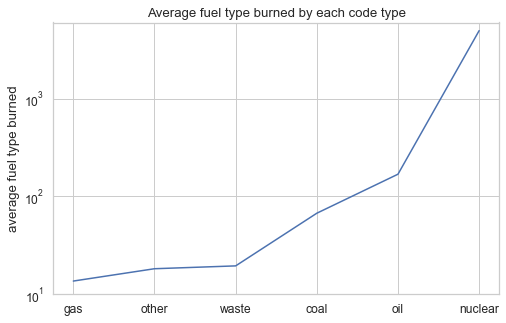

In [260]:
#the plot for the average cost per unit burned is as follows
plt.plot(average_fuel_type_burned)
plt.title("Average fuel type burned by each code type")
plt.ylim(10, 6000)
plt.yscale("log")
plt.ylabel("average fuel type burned")
plt.show()

# Question 4


In [261]:
#this gives the summary statistics for all features both categorical and numerical
fuel_data.describe(include="all")

record_id  utility_id_ferc1   report_year  \
count                      29523      29523.000000  29523.000000   
unique                     29523               NaN           NaN   
top     f1_fuel_2010_12_315_0_12               NaN           NaN   
freq                           1               NaN           NaN   
mean                         NaN        118.601836   2005.806050   
std                          NaN         74.178353      7.025483   
min                          NaN          1.000000   1994.000000   
25%                          NaN         55.000000   2000.000000   
50%                          NaN        122.000000   2006.000000   
75%                          NaN        176.000000   2012.000000   
max                          NaN        514.000000   2018.000000   

       plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
count             29523               29523     29343     2.952300e+04   
unique             2315                   6         9              NaN   
top           big stone                 gas       mcf              NaN   
freq                156               11486     11354              NaN   
mean                NaN                 NaN       NaN     2.622119e+06   
std                 NaN                 NaN       NaN     9.118004e+06   
min                 NaN                 NaN       NaN     1.000000e+00   
25%                 NaN                 NaN       NaN     1.381700e+04   
50%                 NaN                 NaN       NaN     2.533220e+05   
75%                 NaN                 NaN       NaN     1.424034e+06   
max                 NaN                 NaN       NaN     5.558942e+08   

        fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
count          29523.000000               29523.000000   
unique                  NaN                        NaN   
top                     NaN                        NaN   
freq                    NaN                        NaN   
mean               8.492111                 208.649031   
std               10.600220                2854.490090   
min                0.000001                -276.080000   
25%                1.024000                   5.207000   
50%                5.762694                  26.000000   
75%               17.006000                  47.113000   
max              341.260000              139358.000000   

        fuel_cost_per_unit_delivered  fuel_cost_per_mmbtu  
count                   2.952300e+04         29523.000000  
unique                           NaN                  NaN  
top                              NaN                  NaN  
freq                             NaN                  NaN  
mean                    9.175704e+02            19.304354  
std                     6.877593e+04          2091.540939  
min                    -8.749370e+02           -41.501000  
25%                     3.778500e+00             1.940000  
50%                     1.737100e+01             4.127000  
75%                     4.213700e+01             7.745000  
max                     7.964521e+06        359278.000000

In [262]:
#this returns the summary statistics for just the numerical features
fuel_data.describe()
#75th percentile for fuel_mmbtu_per_unit 17.006000
#std 10.600220

utility_id_ferc1   report_year  fuel_qty_burned  fuel_mmbtu_per_unit  \
count      29523.000000  29523.000000     2.952300e+04         29523.000000   
mean         118.601836   2005.806050     2.622119e+06             8.492111   
std           74.178353      7.025483     9.118004e+06            10.600220   
min            1.000000   1994.000000     1.000000e+00             0.000001   
25%           55.000000   2000.000000     1.381700e+04             1.024000   
50%          122.000000   2006.000000     2.533220e+05             5.762694   
75%          176.000000   2012.000000     1.424034e+06            17.006000   
max          514.000000   2018.000000     5.558942e+08           341.260000   

       fuel_cost_per_unit_burned  fuel_cost_per_unit_delivered  \
count               29523.000000                  2.952300e+04   
mean                  208.649031                  9.175704e+02   
std                  2854.490090                  6.877593e+04   
min                  -276.080000                 -8.749370e+02   
25%                     5.207000                  3.778500e+00   
50%                    26.000000                  1.737100e+01   
75%                    47.113000                  4.213700e+01   
max                139358.000000                  7.964521e+06   

       fuel_cost_per_mmbtu  
count         29523.000000  
mean             19.304354  
std            2091.540939  
min             -41.501000  
25%               1.940000  
50%               4.127000  
75%               7.745000  
max          359278.000000

# Question 5



In [263]:
#for skewness
fuel_data.skew(axis=0,skipna= True)
#fuel_qty_burned 15.851495

utility_id_ferc1                  0.605070
report_year                       0.006953
fuel_qty_burned                  15.851495
fuel_mmbtu_per_unit               4.135217
fuel_cost_per_unit_burned        19.787440
fuel_cost_per_unit_delivered    105.014227
fuel_cost_per_mmbtu             171.675535
dtype: float64

In [264]:
#for kurtosis
fuel_data.kurt()
#651.369450

utility_id_ferc1                    1.088432
report_year                        -1.145656
fuel_qty_burned                   651.369450
fuel_mmbtu_per_unit                55.595695
fuel_cost_per_unit_burned         485.255851
fuel_cost_per_unit_delivered    11765.054226
fuel_cost_per_mmbtu             29489.132594
dtype: float64

# Question 6

In [265]:
#this displays the total number of null values for wach feature in the fuel data set
null_sum = fuel_data.isnull().sum()
null_sum #fuel_unit has the highest number of null values

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [266]:
null_sum["fuel_unit"]# the total number of missing values

180

In [267]:
len(fuel_data)#total number of rows in the dataset

29523

In [268]:
perc_missing_values = (null_sum["fuel_unit"]/len(fuel_data))#calculates the percentage of the missing values
perc_missing_values

0.00609694136774718

In [269]:
"{:.3%}".format(perc_missing_values)#percentage of missing values to 3 decimal place

'0.610%'

# Question 8

In [270]:
num_corr = num_data.corr(method = "pearson")#gives us the correlation of the numerical features
num_corr

utility_id_ferc1  report_year  fuel_qty_burned  \
utility_id_ferc1                      1.000000     0.093323        -0.057447   
report_year                           0.093323     1.000000         0.012952   
fuel_qty_burned                      -0.057447     0.012952         1.000000   
fuel_mmbtu_per_unit                  -0.066946    -0.110853        -0.080946   
fuel_cost_per_unit_burned            -0.037863     0.013599        -0.018535   
fuel_cost_per_unit_delivered         -0.016414    -0.014043        -0.003551   
fuel_cost_per_mmbtu                   0.006122     0.010261        -0.001896   

                              fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
utility_id_ferc1                        -0.066946                  -0.037863   
report_year                             -0.110853                   0.013599   
fuel_qty_burned                         -0.080946                  -0.018535   
fuel_mmbtu_per_unit                      1.000000                  -0.010034   
fuel_cost_per_unit_burned               -0.010034                   1.000000   
fuel_cost_per_unit_delivered            -0.009039                   0.011007   
fuel_cost_per_mmbtu                     -0.005884                  -0.000437   

                              fuel_cost_per_unit_delivered  \
utility_id_ferc1                                 -0.016414   
report_year                                      -0.014043   
fuel_qty_burned                                  -0.003551   
fuel_mmbtu_per_unit                              -0.009039   
fuel_cost_per_unit_burned                         0.011007   
fuel_cost_per_unit_delivered                      1.000000   
fuel_cost_per_mmbtu                              -0.000109   

                              fuel_cost_per_mmbtu  
utility_id_ferc1                         0.006122  
report_year                              0.010261  
fuel_qty_burned                         -0.001896  
fuel_mmbtu_per_unit                     -0.005884  
fuel_cost_per_unit_burned               -0.000437  
fuel_cost_per_unit_delivered            -0.000109  
fuel_cost_per_mmbtu                      1.000000

(7.0, 0.0)

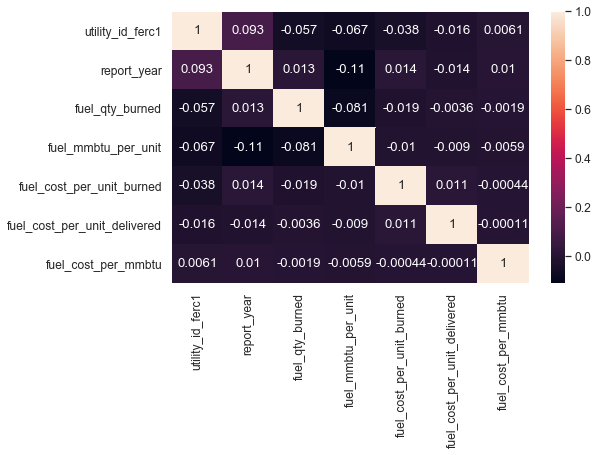

In [271]:
#the correlation matrix on a heatmap is displayed as follows
corr = sns.heatmap(num_corr,annot= True)
bottom, top = corr.get_ylim()
corr.set_ylim(bottom + 0.5,top - 0.5)

In [272]:
#second and third lowest correlation with the Fuel Cost Per Unit Burned with slicing
num_corr.loc["fuel_cost_per_unit_burned"].sort_values(ascending=True)[1:3]

fuel_qty_burned       -0.018535
fuel_mmbtu_per_unit   -0.010034
Name: fuel_cost_per_unit_burned, dtype: float64

# Question 9

In [273]:
#grouping the fuel cost per unit burned of the fuel type code for each year
yearly_costs = fuel_data.groupby(["report_year","fuel_type_code_pudl"])["fuel_cost_per_unit_burned"].sum()
yearly_costs

report_year  fuel_type_code_pudl
1994         coal                    14984.572
             gas                     10792.496
             nuclear                227983.354
             oil                      9362.194
             other                     116.737
                                       ...    
2018         coal                     9488.197
             gas                      4322.494
             nuclear                173267.161
             oil                     33836.602
             waste                     660.972
Name: fuel_cost_per_unit_burned, Length: 148, dtype: float64

In [274]:
#to calculate the percentage change of 2 years, we say ((new year-old year)/old year) * 100
year_1994,year_1998 = yearly_costs.loc[[1994,1998],"coal"]
percentage_change = ((year_1998 - year_1994)/(year_1994))*100
percentage_change

-20.56765451826049

# Question 10



In [275]:
#yearly mean costs of each fuel type per unit delivered for reach year
yearly_costs = fuel_data.groupby(["report_year","fuel_type_code_pudl"])["fuel_cost_per_unit_delivered"].mean().sort_values()
yearly_costs.tail()
#1997 is the year with the highest average mean

report_year  fuel_type_code_pudl
2018         coal                     1204.041209
2009         oil                      1910.951599
2000         nuclear                 20888.133304
1996         nuclear                241737.169098
1997         nuclear                392461.214710
Name: fuel_cost_per_unit_delivered, dtype: float64

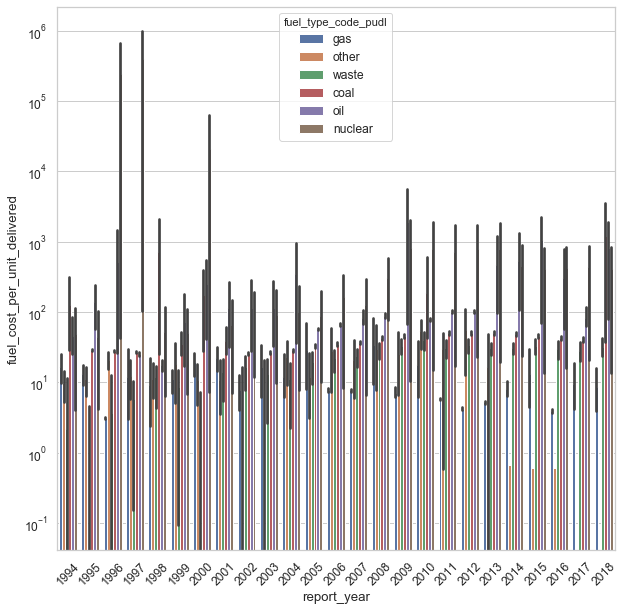

In [276]:
#the graph looks like this
plt.figure(figsize=(10,10))#scale of the figure
plt.xticks(rotation=45)# angle of measurement
x, y, hue = fuel_data["report_year"],fuel_data["fuel_cost_per_unit_delivered"], fuel_data["fuel_type_code_pudl"]
sns.barplot(x,y,hue,hue_order = ["gas","other","waste","coal","oil" ,"nuclear"])
plt.yscale("log")